# Density contours in DM halos

Implementation of the (Jing & Suto 2002) algorithm to c ompute density shapes. 


$\rho = \sum_{i} m_i W(r, h_i)$


$ W(r, h_i) = \dfrac{1}{\pi h_i^3} \begin{cases}
    1 - \dfrac{3}{2}\left(\dfrac{r}{h_i} \right)^2 + \dfrac{3}{4}\left(\dfrac{r}{h_i} \right)^3       & \quad \text{if } (r \leq h_i)\\
    \dfrac{1}{4}\left(2-\dfrac{r}{h_i}\right)^3  & \quad \text{if } (h_i \leq r \leq 2h_i)\\
    0 & \quad \text{otherwise}
  \end{cases} $
  
  
  $h_i$ is one half of the sphere containing the 32 neighboors

## To do:

1. Finish the proper Kernel implementation.
2. Make pretty plots

In [1]:
%pylab inline
from sklearn.neighbors import KDTree
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl

Populating the interactive namespace from numpy and matplotlib


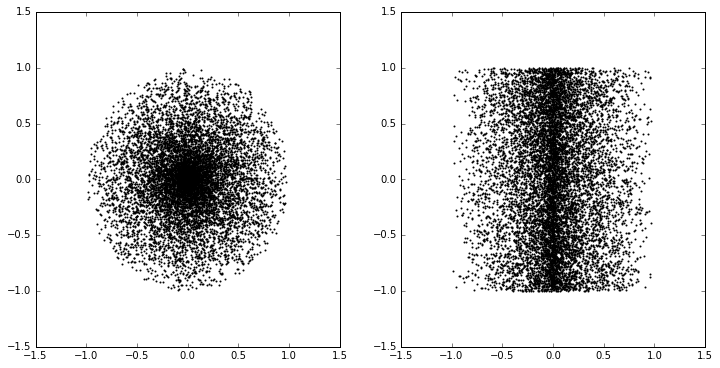

In [2]:
figure(figsize=(12, 6))
n_particles = 10000
phi = random.rand(n_particles) * 2*pi
theta = random.rand(n_particles) * 2 - 1
R = random.rand(n_particles)
X = R * sin(phi) * sin(arccos(theta))
Y = R * cos(phi) * sin(arccos(theta))
Z = random.rand(n_particles) * 2 - 1
plt.subplot(1, 2, 1)
scatter(X, Y, s=1)
plt.subplot(1, 2, 2)
scatter(X, Z, s=1)
M = random.rand(n_particles) * 10 

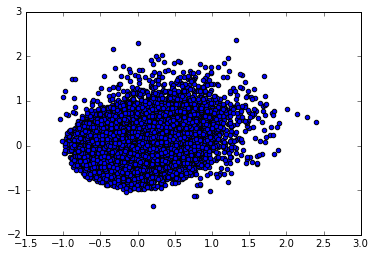

In [163]:
x1 = np.random.normal(0.5, 0.5, 2000)
y1 = np.random.normal(0.5, 0.5, 2000)
z1 = np.zeros(2000)

X1 = np.concatenate((X, x1))
Y1 = np.concatenate((Y, y1))
Z1 = np.concatenate((Z, z1))

scatter(X1, Y1)

## 1. Find the 32 nearest neighboors to each particle

[ 0.24522015 -0.26143125 -0.65731275] [0 0 0]
[[ 0.00627428  0.01338562  0.01657706  0.01769387  0.02196153  0.02378269
   0.02467552  0.0261816   0.02852744  0.02907602  0.03038285  0.03078879
   0.0320428   0.03454637  0.03578899  0.0358872   0.03599072  0.03775135
   0.0378377   0.0391901   0.04067394  0.04204636  0.04225148  0.04253596
   0.04260299  0.04300236  0.04367022  0.04737541  0.05145311  0.05169844
   0.05218766  0.05229239  0.05354908]]


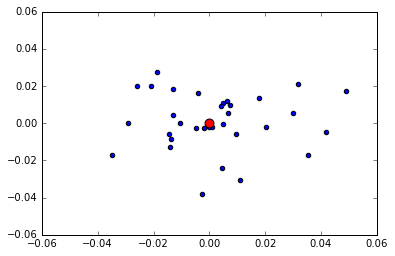

In [33]:
D = np.array([X, Y, Z])
D = D.T
tree = KDTree(D, leaf_size=2500) 
D1 = np.array([0, 0, 0])
dist, ind = tree.query(D1, k=33)   
scatter(X[ind], Y[ind])
scatter(D1[0], D1[1], s=80, c='r')
print D[0], D1
print dist

In [56]:
def nearest_neighboors(x, y, z, r):
    D = np.array([x, y, z])
    D = D.T
    tree = KDTree(D, leaf_size=2500)  
    dist, ind = tree.query(r, k=33)   
    return dist[0], ind[0]

In [57]:
distances, ids = nearest_neighboors(X, Y, Z, [0, 0,0])

In [58]:
distances[0]

0.006274282602524924

In [59]:
def particles(IDs, X, Y, Z, M):
    Xn = np.zeros(len(IDs[0]))
    Yn = np.zeros(len(IDs[0]))
    Zn = np.zeros(len(IDs[0]))
    Mn = np.zeros(len(IDs[0]))
    for i in range(len(IDs[0])):
        Xn[i] = X[IDs[0][i]]
        Yn[i] = Y[IDs[0][i]]
        Zn[i] = Z[IDs[0][i]]
        Mn[i] = M[ids[0][i]]
    return Xn, Yn, Zn, Mn

In [133]:
def kernel(r, h):
    if r<h:
        W = 1. - 3./2.*(r/h)**2.0 + 3./4.*(r/h)**3.0
    elif ((r>h) & (r<2.0*h)):
        W = 1./4. * (2. - r/h)**3.
    else:
        W = 0.0
    return W/(np.pi*h**3.0)

In [134]:
def density(x,y,z, mass, r):
    dn, idn = nearest_neighboors(x, y, z, r)
    h = np.max(dn)/2.0
    rho = np.zeros(33.0)
    m = mass[idn]
    for i in range(len(dn)):
        W = kernel(dn[i], h)
        rho[i] = m[i]*W
    return np.sum(rho)

In [151]:
def grid(X, Y, Z, res):
    mass = np.ones(len(X))
    rho = np.zeros((res, res))
    rx = np.linspace(min(X)+min(X)*0.2, max(X)+max(X)*0.2, res)
    ry = np.linspace(min(Y)+min(Y)*0.2, max(Y)+max(Y)*0.2, res)
    for i in range(res):
        for j in range(res):
            rho[i][j] = density(X, Y, Z, mass, [rx[i], ry[j], 0])
    return rho
    

In [ ]:
Z = np.zeros(len(X))
rho_test = grid(X1, Y1, Z1, 500)

In [ ]:
figure(figsize=(8,6))
imshow(np.log10(rho_test), origin='lower', extent=[min(X), max(X), min(Y), max(Y)], cmap='terrain')
colorbar()
#scatter(X, Y, s=0.1, alpha=0.5)

(-1.5, 3.0, -2.0, 3.0)

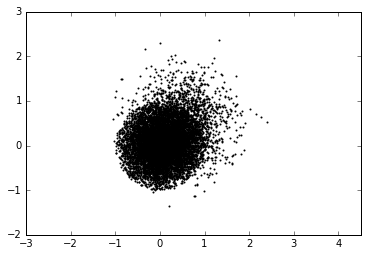

In [166]:
scatter(X1, Y1, s=1.0)
axis('equal')